In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('AAPL_data.csv') 
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [4]:
df.describe()


,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [5]:
df.shape


(1259, 7)

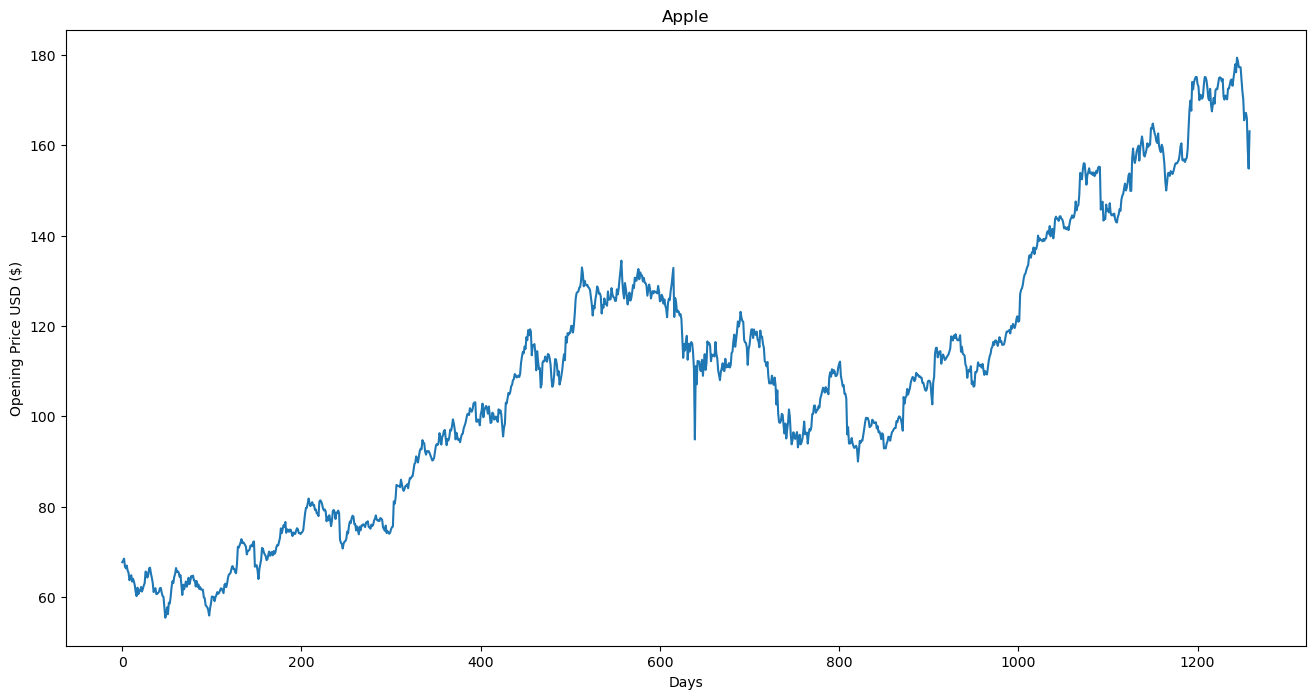

In [6]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

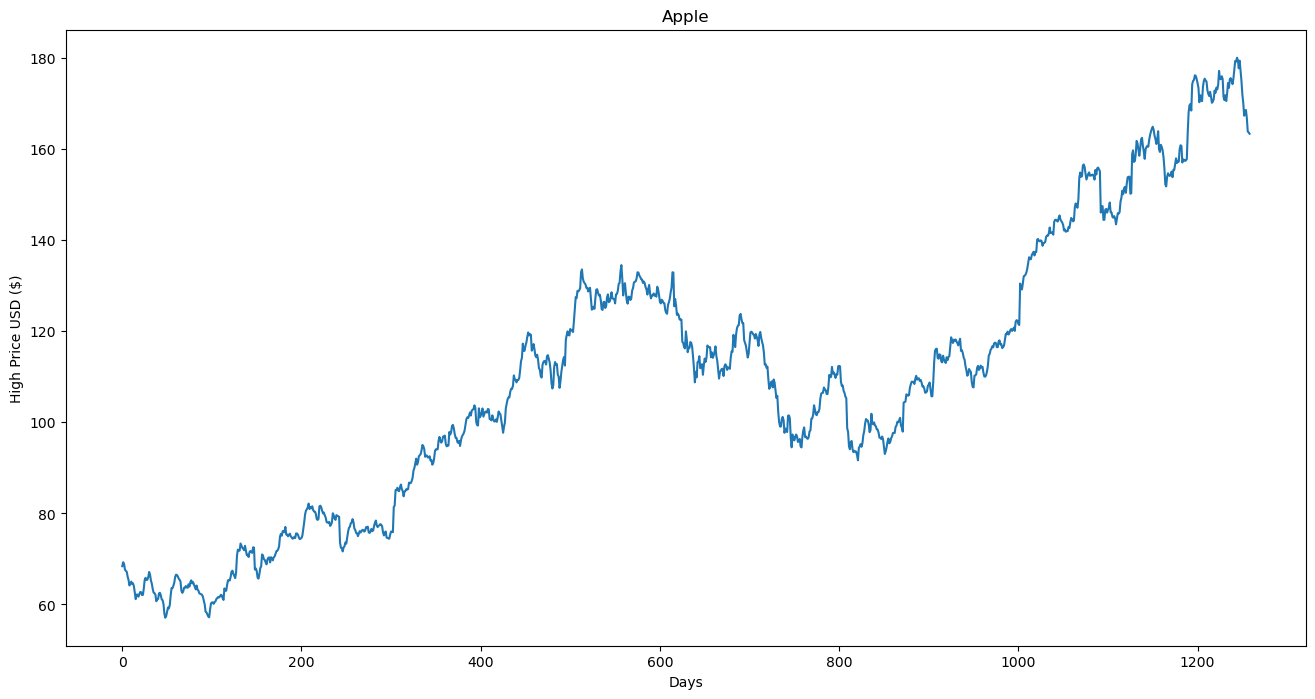

In [7]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

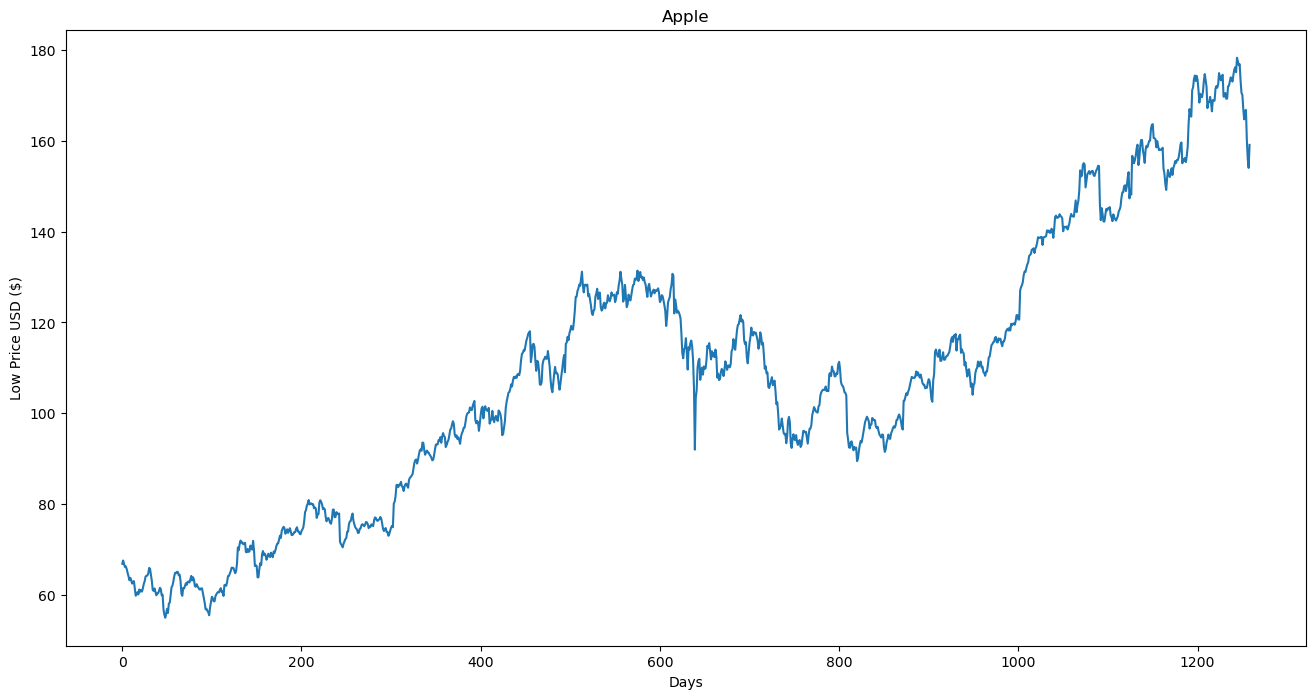

In [8]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

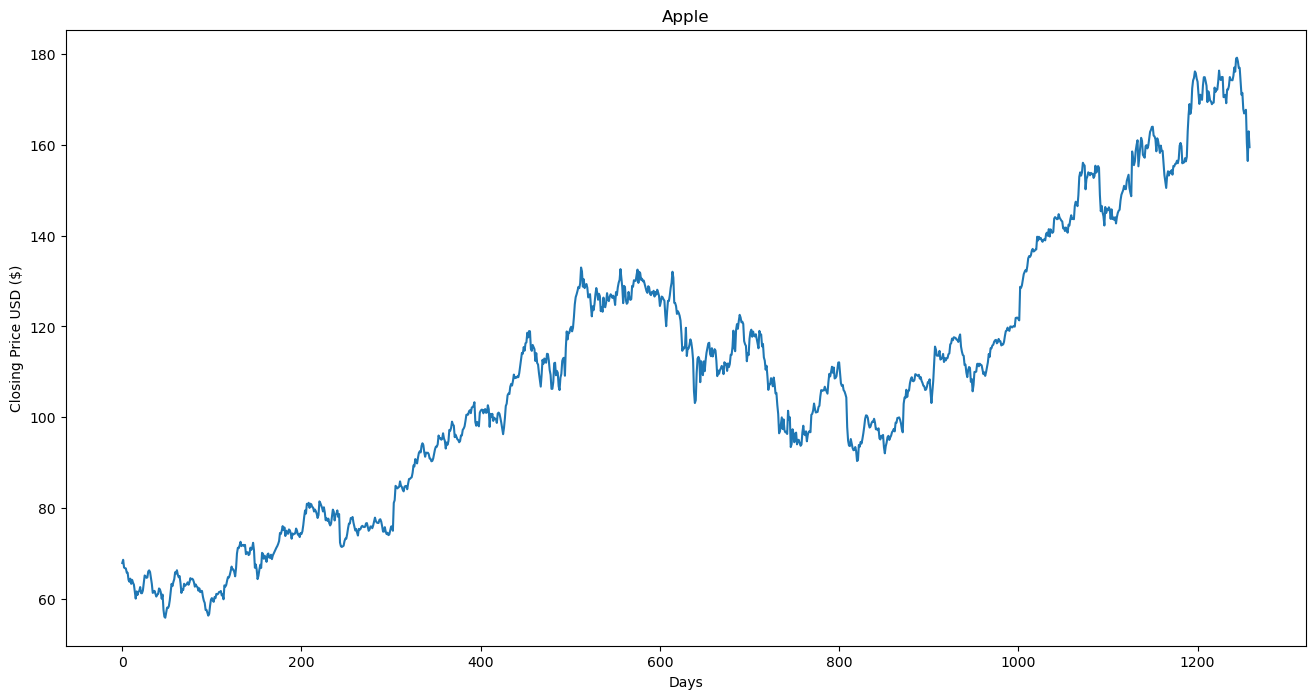

In [9]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [10]:
df2 = df['close']


In [11]:
df2.tail()

1254    167.78
1255    160.50
1256    156.49
1257    163.03
1258    159.54
Name: close, dtype: float64

In [12]:
df2 = pd.DataFrame(df2)     


In [13]:
df2.tail()


,close
1254,167.78
1255,160.50
1256,156.49
1257,163.03
1258,159.54


In [90]:
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [91]:
df2.tail()

,close,Prediction
1254,167.78,NaN
1255,160.50,NaN
1256,156.49,NaN
1257,163.03,NaN
1258,159.54,NaN


In [92]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)


[[ 67.8542]
 [ 68.5614]
 [ 66.8428]
 ...
 [160.86  ]
 [159.65  ]
 [158.28  ]]


C:\Users\Saad\AppData\Local\Temp\ipykernel_4184\4190713351.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [93]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)


[ 60.1142  59.6314  59.2928 ... 156.49   163.03   159.54  ]


In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [95]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [96]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Saad\AppData\Local\Temp\ipykernel_4184\1876488320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[144.53],
       [143.68],
       [143.79],
       [143.65],
       [146.58],
       [147.51],
       [147.06],
       [146.53],
       [148.96],
       [153.01],
       [153.99],
       [153.26],
       [153.95],
       [156.1 ],
       [155.7 ],
       [155.47],
       [150.25],
       [152.54],
       [153.06],
       [153.99],
       [153.8 ],
       [153.34],
       [153.87],
       [153.61],
       [153.67],
       [152.76],
       [153.18],
       [155.45],
       [153.93],
       [154.45],
       [155.37],
       [154.99],
       [148.98],
       [145.42],
       [146.59],
       [145.16],
       [144.29],
       [142.27],
       [146.34],
       [145.01],
       [145.87],
       [145.63],
       [146.28],
       [145.82],
       [143.73],
       [145.83],
       [143.68],
       [144.02],
       [143.5 ],
       [144.09],
       [142.73],
       [144.18],
       [145.06],
       [145.53],
       [145.74],
       [147.77],
       [149.04],
       [149.56],
       [150.08

In [97]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[159.88  169.98  158.73  156.07  168.11  150.55  150.55  168.11  169.64
 153.28  155.06  153.81  154.48  153.48  155.39  155.3   155.84  155.9
 156.55  155.06  156.99  159.88  160.47  159.76  159.76  156.25  153.81
 157.1   156.41  157.41  163.05  166.72  169.64  166.89  168.11  175.88
 174.25  167.23  176.24  175.88  174.67  173.97  171.34  169.08  171.1
 170.15  169.98  167.305 174.96  157.21  174.09  173.07  175.88  171.85
 171.05  150.55  169.64  169.01  155.84  169.37  172.67  155.84  155.9
 172.22  173.97  176.42  174.54  174.35  175.01  175.01  170.57  153.48
 175.01  169.23  172.26  172.23  173.03  175.    174.35  174.33  174.29
 175.28  177.09  176.19  179.1   179.26  175.    177.    177.04  174.22
 171.51  171.51  167.96  166.97  172.26  175.01  160.5   156.49  163.03
 159.54 ]


In [98]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[151.25616294 150.45243871 150.55645008 150.42407197 153.19455668
 154.07392555 153.64842449 153.14727879 155.44498454 159.27449412
 160.20114088 159.5108836  160.16331857 162.1962681  161.81804493
 161.60056661 156.66475426 158.8300819  159.32177202 160.20114088
 160.02148488 159.58652824 160.08767393 159.84182887 159.89856235
 159.03810464 159.43523897 161.58165545 160.14440741 160.63609753
 161.50601082 161.14669881 155.4638957  152.09770949 153.20401226
 151.85186443 151.02922904 149.11920204 152.96762278 151.71003075
 152.52321056 152.29627666 152.91088931 152.47593266 150.49971661
 152.48538824 150.45243871 150.7739284  150.28223828 150.84011746
 149.55415868 150.92521767 151.75730864 152.20172087 152.40028803
 154.31977061 155.52062917 156.01231929 156.50400941 157.39283386
 156.74985447 156.68366542 158.40458083 159.01919348 159.69999519
 156.95787721 155.95558582 155.22750622 164.55070733 163.17964834
 161.6951224  162.4704799  164.75873007 165.95958863 166.88623539
 161.45873

In [99]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\Saad\AppData\Local\Temp\ipykernel_4184\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


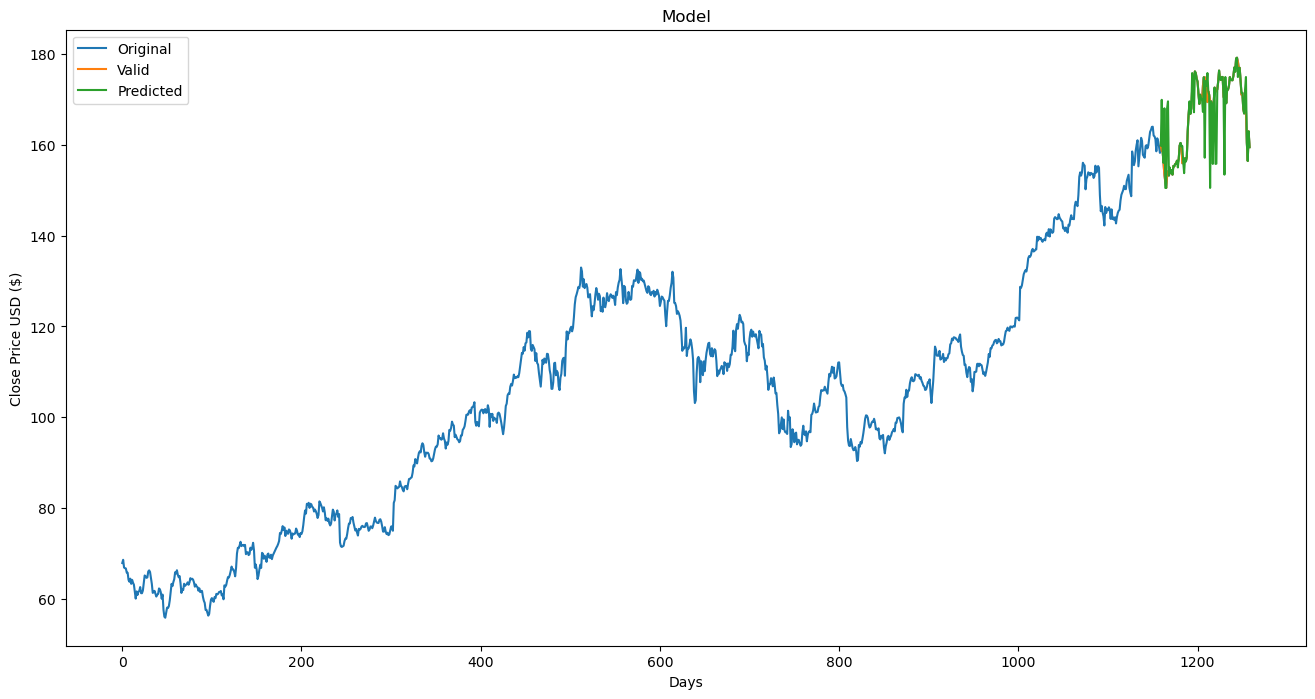

In [100]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()